In [30]:
# Generate random data points
np.random.seed(25)
num_points = 100
class_0_points = np.random.normal(loc=[2, 2], scale=[1, 1], size=(num_points, 2))
class_1_points = np.random.normal(loc=[4, 4], scale=[1, 1], size=(num_points, 2))

# Function to classify the points
def classify_points(point):
    # Assuming a simple linear classification based on the x-coordinate
    if point[0] < 3:
        return 0
    else:
        return 1

# Classify the data points
classified_points = np.zeros(2 * num_points)
for i in range(num_points):
    classified_points[i] = classify_points(class_0_points[i])
    classified_points[i + num_points] = classify_points(class_1_points[i])


In [28]:
# Train SVM classifier
svm = SVC(kernel='linear')
svm.fit(np.vstack((class_0_points, class_1_points)), classified_points)

# Create meshgrid for decision boundary visualization
h = 0.02  # Step size in the mesh
x_min, x_max = np.min(class_0_points[:, 0]) - 1, np.max(class_1_points[:, 0]) + 1
y_min, y_max = np.min(class_0_points[:, 1]) - 1, np.max(class_1_points[:, 1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on meshgrid points
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


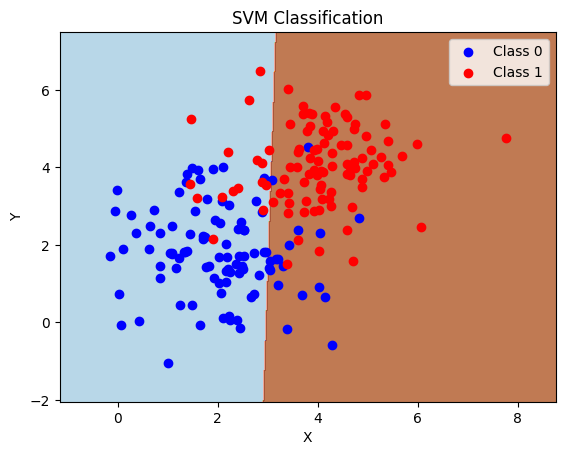

In [29]:
# Create scatter plot
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(class_0_points[:, 0], class_0_points[:, 1], c='blue', label='Class 0')
plt.scatter(class_1_points[:, 0], class_1_points[:, 1], c='red', label='Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('SVM Classification')
plt.legend()
plt.show()